https://lms.mipt.ru/mod/quiz/view.php?id=154317

## 1 задание

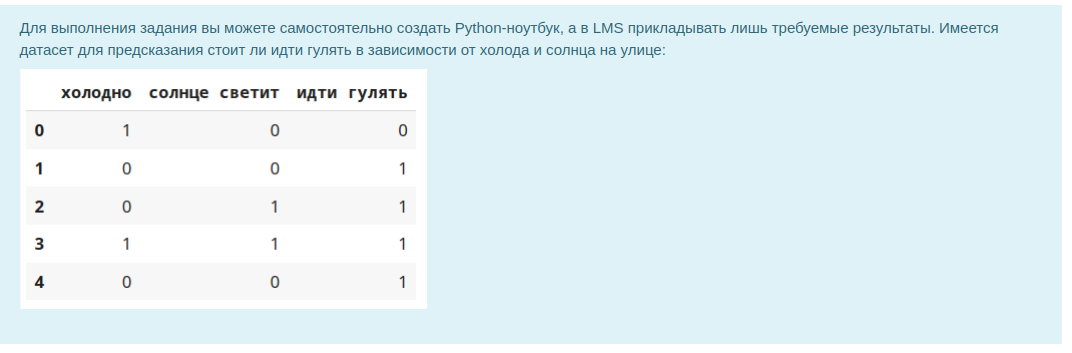

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'холодно': [1, 0, 0, 1, 0],
    'солнце светит': [0, 0, 1, 1, 0],
    'идти гулять': [0, 1, 1, 1, 1]
})

df

,холодно,солнце светит,идти гулять
0,1,0,0
1,0,0,1
2,0,1,1
3,1,1,1
4,0,0,1


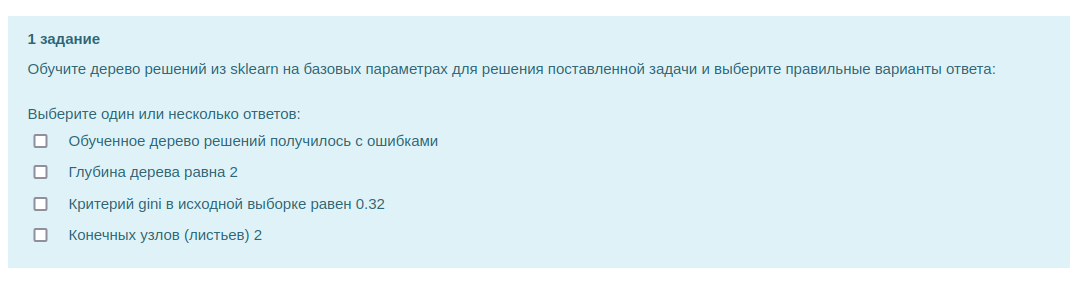

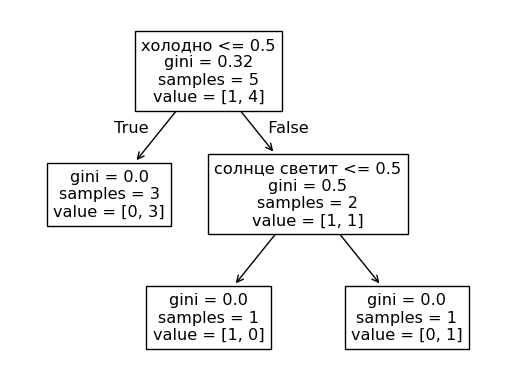

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier().fit(df.drop(columns=['идти гулять']),
                                  df['идти гулять'])

plot_tree(dt, feature_names=df.columns[:2]);

## 2 задание

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'холодно': [1, 0, 0, 1, 0],
    'солнце светит': [0, 0, 1, 1, 0],
    'идти гулять': [0, 1, 1, 1, 1]
})

df

,холодно,солнце светит,идти гулять
0,1,0,0
1,0,0,1
2,0,1,1
3,1,1,1
4,0,0,1


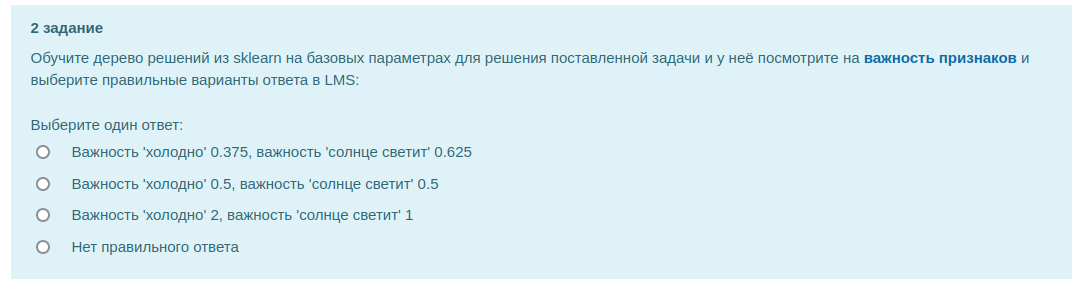

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier().fit(df.drop(columns=['идти гулять']),
                                  df['идти гулять'])

pd.Series(dt.feature_importances_, index=df.columns[:2])

,0
холодно,0.375
солнце светит,0.625


## 3 задание

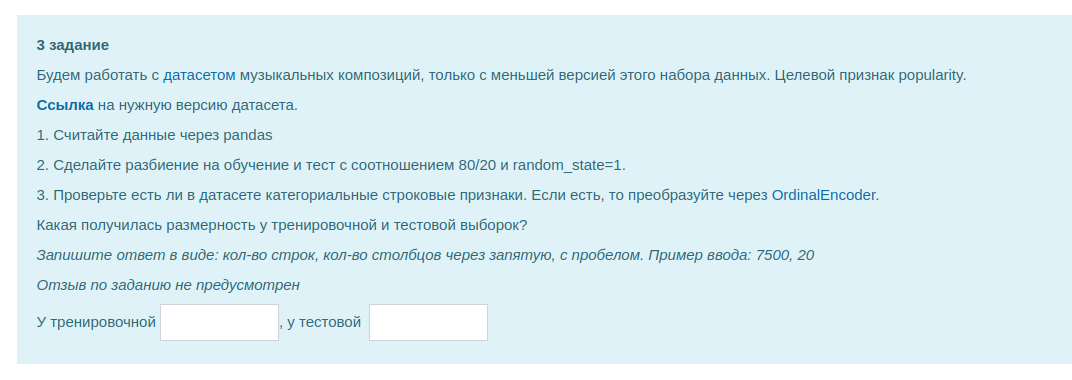

In [ ]:
!wget 'https://drive.google.com/uc?id=16sHehU8YbuPHAxibh4KzYAnAnOEsNlEN' -O music.csv

--2024-09-27 12:48:31--  https://drive.google.com/uc?id=16sHehU8YbuPHAxibh4KzYAnAnOEsNlEN
Resolving drive.google.com (drive.google.com)... 74.125.132.100, 74.125.132.102, 74.125.132.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.132.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=16sHehU8YbuPHAxibh4KzYAnAnOEsNlEN [following]
--2024-09-27 12:48:31--  https://drive.usercontent.google.com/download?id=16sHehU8YbuPHAxibh4KzYAnAnOEsNlEN
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.194.132, 2607:f8b0:4001:c10::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.194.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 434838 (425K) [application/octet-stream]
Saving to: ‘music.csv’

music.csv           100%[===================>] 424.65K  --.-KB/s    in 0.009s  

2024-09-27 12:48:33 (47.8 MB/s) - ‘

In [ ]:
import pandas as pd

df = pd.read_csv('music.csv')
print(df.shape)
df.head()

(5000, 16)


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,77,230613,False,0.509,0.448,4,-7.552,0,0.0357,0.00713,0.013700,0.2440,0.221,156.909,3,blues
1,79,208760,False,0.636,0.676,2,-3.442,1,0.0263,0.08070,0.000000,0.0831,0.273,113.980,4,blues
2,76,180690,False,0.573,0.539,2,-6.091,0,0.0322,0.01620,0.000012,0.1050,0.390,75.012,4,blues
3,84,232106,False,0.743,0.446,4,-7.807,0,0.0683,0.00390,0.118000,0.3370,0.278,123.596,4,blues
4,76,225026,False,0.572,0.214,7,-15.625,1,0.0293,0.64900,0.129000,0.1250,0.485,95.542,4,blues


In [ ]:
from sklearn.model_selection import train_test_split

target = 'popularity'

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=target),
                                                    df[target],
                                                    test_size=0.2,
                                                    random_state=1)

X_train.shape, X_test.shape

((4000, 15), (1000, 15))

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

cat_column = ['track_genre']
oe = OrdinalEncoder()
oe.fit(X_train[cat_column])

X_train[oe.get_feature_names_out()] = oe.transform(X_train[cat_column])
X_test[oe.get_feature_names_out()] = oe.transform(X_test[cat_column])

X_train.shape, X_test.shape

((4000, 15), (1000, 15))

## 4 задание

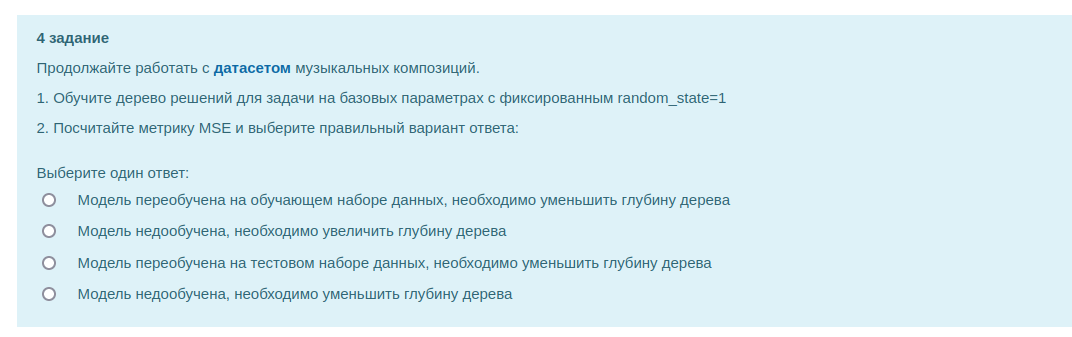

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=1)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
from sklearn.metrics import mean_squared_error

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

mean_squared_error(y_train, train_preds), mean_squared_error(y_test, test_preds)

(20.26219201619459, 882.1089755234448)

## 5 задание

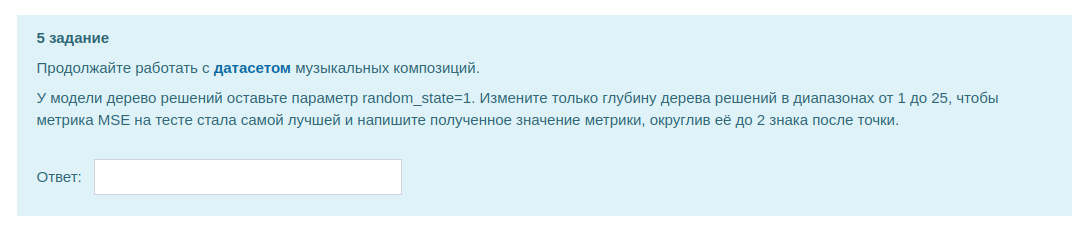

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

min_mse_test = 1e10
best_depth = 0

for depth in range(1, 25):
    model = DecisionTreeRegressor(max_depth=depth, random_state=1)
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    if min_mse_test > mean_squared_error(y_test, test_preds):
        min_mse_test = mean_squared_error(y_test, test_preds)
        best_depth = depth

round(min_mse_test, 2), best_depth

(705.91, 10)

## 6 задание

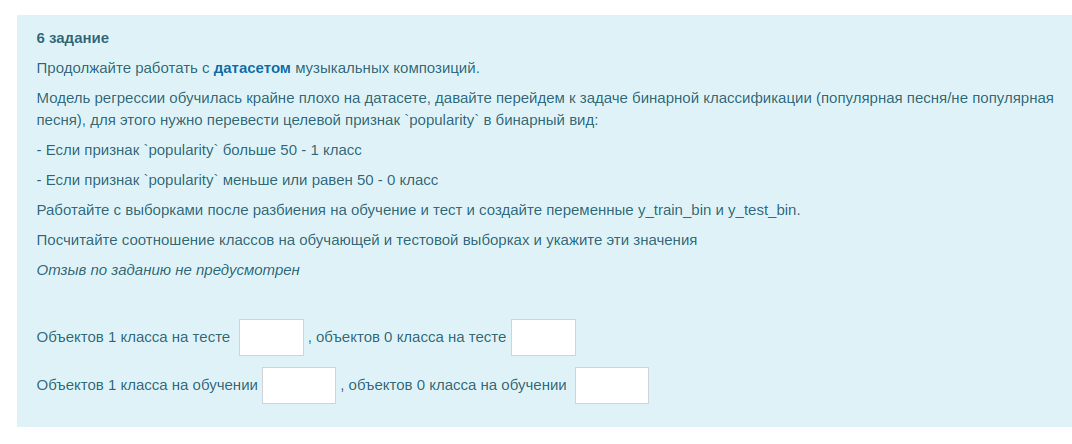

In [ ]:
import numpy as np

y_train_bin = np.zeros_like(y_train)
y_train_bin[y_train > 50] = 1

y_train_bin = pd.Series(y_train_bin)
y_train_bin.value_counts()

,count
0,2373
1,1627


In [ ]:
y_test_bin = np.zeros_like(y_test)
y_test_bin[y_test > 50] = 1

y_test_bin = pd.Series(y_test_bin)
y_test_bin.value_counts()

,count
0,599
1,401


## 7 задание

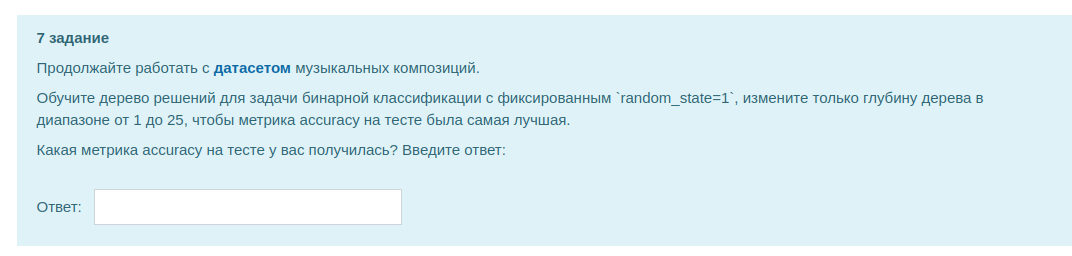

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_acc_test = 0
best_depth = 0

for depth in range(1, 25):
    model = DecisionTreeClassifier(max_depth=depth, random_state=1)
    model.fit(X_train, y_train_bin)
    if max_acc_test < model.score(X_test, y_test_bin):
        max_acc_test = model.score(X_test, y_test_bin)
        best_depth = depth

max_acc_test, best_depth

(0.698, 17)

## 8 задание

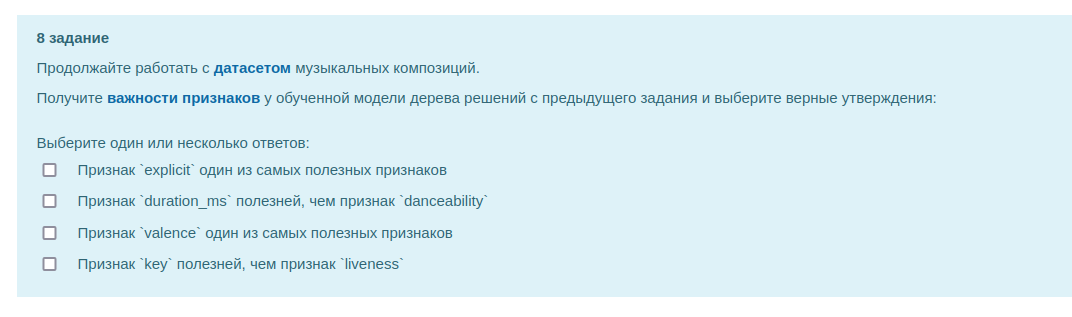

In [ ]:
imps = pd.Series(model.feature_importances_, index=X_train.columns)
imps.sort_values()

,0
mode,0.007811
time_signature,0.008729
explicit,0.011400
key,0.039794
instrumentalness,0.061141
tempo,0.071523
danceability,0.074721
liveness,0.077025
energy,0.079458
speechiness,0.085713
